In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
data = pd.read_csv('car_age_price.csv')


In [21]:
# Explore the dataset
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [22]:
# Split the data into features (year) and target (price)
X = data[['Year']]
y = data['Price']


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create and train a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
import warnings

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)
# Predict the price for a 2022 model
predicted_price_linear = linear_reg.predict([[2022]])

In [26]:
# Create and train a Lasso regression model
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

Lasso()

In [27]:
import warnings
# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)
# Predict the price for a 2022 model
predicted_price_lasso = lasso_reg.predict([[2022]])

In [28]:
# Evaluate the linear regression model
linear_predictions = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

In [29]:
# Evaluate the Lasso regression model
lasso_predictions = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

In [30]:
# Compare model performance
print("Predicted Price for 2022 Model (Linear Regression):", predicted_price_linear)
print("Predicted Price for 2022 Model (Lasso Regression):", predicted_price_lasso)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R^2:", linear_r2)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R^2:", lasso_r2)


Predicted Price for 2022 Model (Linear Regression): [743601.61594504]
Predicted Price for 2022 Model (Lasso Regression): [743599.37427144]
Linear Regression MSE: 4326906256.829671
Linear Regression R^2: 0.36759313425902185
Lasso Regression MSE: 4326859771.015669
Lasso Regression R^2: 0.3675999284778446


In [31]:
# Visualize the data and regression lines using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='Price'>

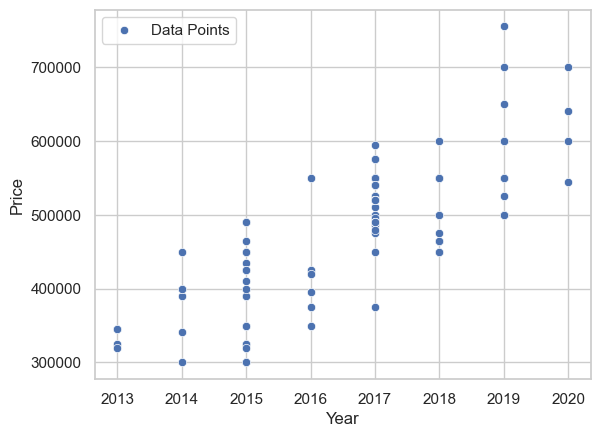

In [32]:
# Scatter plot of the data
sns.scatterplot(x="Year", y="Price", data=data, label="Data Points")

<Axes: xlabel='Year'>

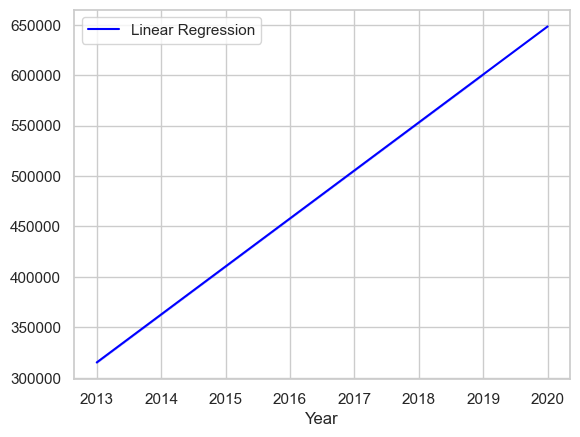

In [33]:
# Linear regression line
sns.lineplot(x=X_test["Year"], y=linear_predictions, label="Linear Regression", color="blue")

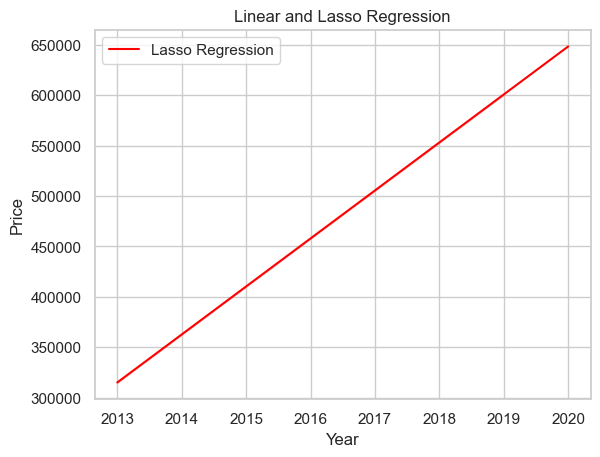

In [34]:
# Lasso regression line
sns.lineplot(x=X_test["Year"], y=lasso_predictions, label="Lasso Regression", color="red")
plt.title("Linear and Lasso Regression")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()